# **K-means Clustering Analysis**

## **Objective**
This notebook aims to identify distinct groups of employees based on their mental health and related factors. By clustering the data, we can uncover patterns and provide actionable insights to improve workplace well-being.

---

## **Steps**
1. **Load and Preprocess Data**:
   - Read the dataset.
   - Apply manual standardization to encode categorical and numerical data.
   - Select relevant features for clustering.

2. **Determine Optimal Number of Clusters**:
   - Use the Elbow Method and Silhouette Scores to identify the best number of clusters.

3. **Apply K-means Clustering**:
   - Perform clustering and assign labels to data points.

4. **Visualize Results**:
   - Reduce dimensions with PCA and plot clusters in a 2D space.

5. **Analyze Cluster Characteristics**:
   - Summarize and interpret the characteristics of each cluster.

In [1]:
# **Step 1: Import Libraries and Load Data**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Set visualization styles
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.2)

# Load the dataset
data_path = 'Impact_of_Remote_Work_on_Mental_Health.csv'
df = pd.read_csv(data_path)

# Display initial dataset structure
print("Initial Dataset:")
df.head()

Initial Dataset:


,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


In [2]:
# **Step 2: Preprocess the Data**

# Functions for manual encoding
def work_life_balance_to_numeric(work_life_balance):
    mapping = {5: 0, 4: 1, 3: 2, 2: 3, 1: 4}
    return mapping.get(work_life_balance, None)

def stress_level_to_numeric(stress_level):
    mapping = {"Medium": 1, "High": 2, "Low": 0}
    return mapping.get(stress_level, None)

def social_isolation_to_numeric(social_isolation):
    return social_isolation - 1

def satisfaction_with_remote_work_to_numeric(satisfaction):
    mapping = {"Unsatisfied": 0, "Satisfied": 2, "Neutral": 1}
    return mapping.get(satisfaction, None)

def remote_work_support_to_numeric(support):
    mapping = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
    return mapping.get(support, None)

# Drop unnecessary columns
if "Employee_ID" in df.columns:
    df = df.drop(columns=["Employee_ID"])

# Apply encoding to relevant columns
df["Work_Life_Balance_Rating"] = df["Work_Life_Balance_Rating"].apply(work_life_balance_to_numeric)
df["Stress_Level"] = df["Stress_Level"].apply(stress_level_to_numeric)
df["Social_Isolation_Rating"] = df["Social_Isolation_Rating"].apply(social_isolation_to_numeric)
df["Satisfaction_with_Remote_Work"] = df["Satisfaction_with_Remote_Work"].apply(satisfaction_with_remote_work_to_numeric)
df["Company_Support_for_Remote_Work"] = df["Company_Support_for_Remote_Work"].apply(remote_work_support_to_numeric)

# Drop rows with missing values in the selected columns
selected_columns = [
    'Stress_Level', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating',
    'Satisfaction_with_Remote_Work', 'Company_Support_for_Remote_Work'
]
data_for_clustering = df[selected_columns].dropna()

print("Preprocessed Data Sample:")
data_for_clustering.head()

Preprocessed Data Sample:


,Stress_Level,Work_Life_Balance_Rating,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work
0,1,3,0,0,0
1,1,4,2,2,1
2,1,0,3,0,4
3,2,1,2,0,2
4,2,3,2,0,2


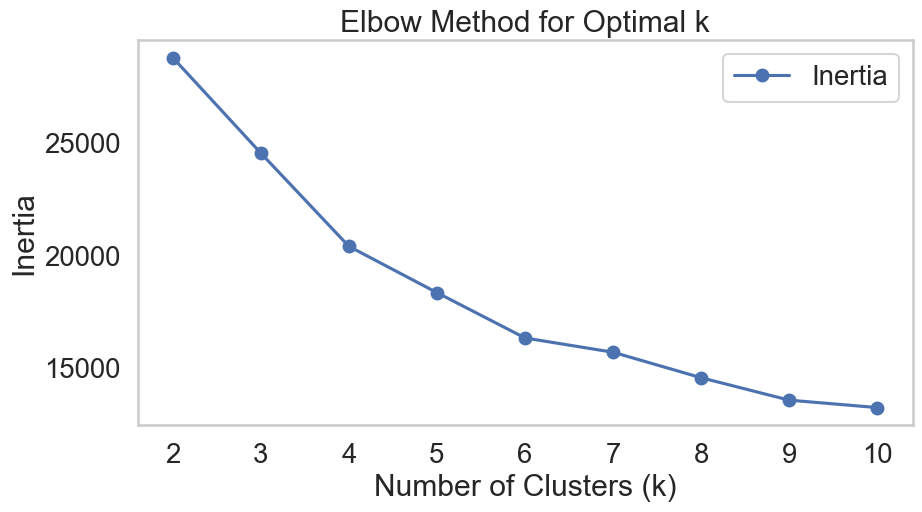

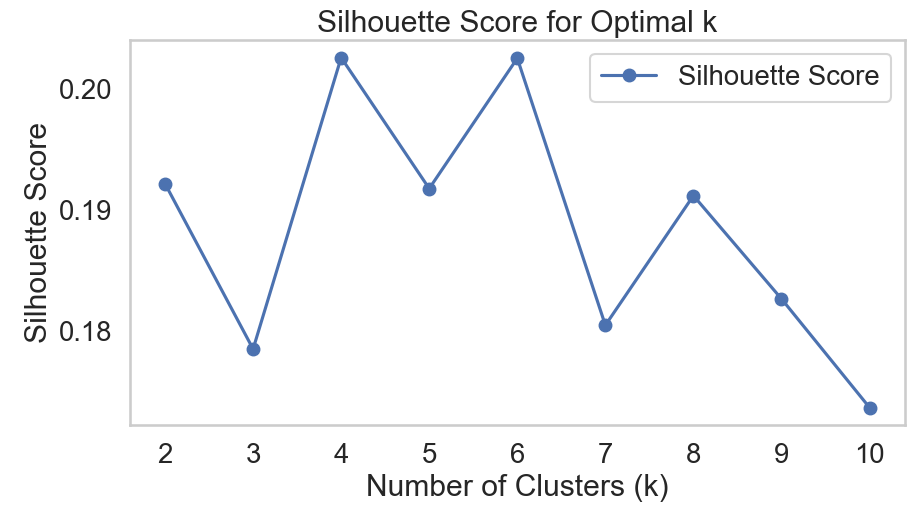

In [3]:
# **Step 3: Determine Optimal Number of Clusters**

# Elbow method and silhouette score
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_for_clustering, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.legend()
plt.grid()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.legend()
plt.grid()
plt.show()

In [4]:
# Step 4: Apply K-means Clustering

# Set the optimal number of clusters based on the above analysis
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_for_clustering['Cluster'] = kmeans.fit_predict(data_for_clustering)

print("Clustered Data Sample:")
data_for_clustering.head()

Clustered Data Sample:


,Stress_Level,Work_Life_Balance_Rating,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Cluster
0,1,3,0,0,0,1
1,1,4,2,2,1,1
2,1,0,3,0,4,2
3,2,1,2,0,2,2
4,2,3,2,0,2,0


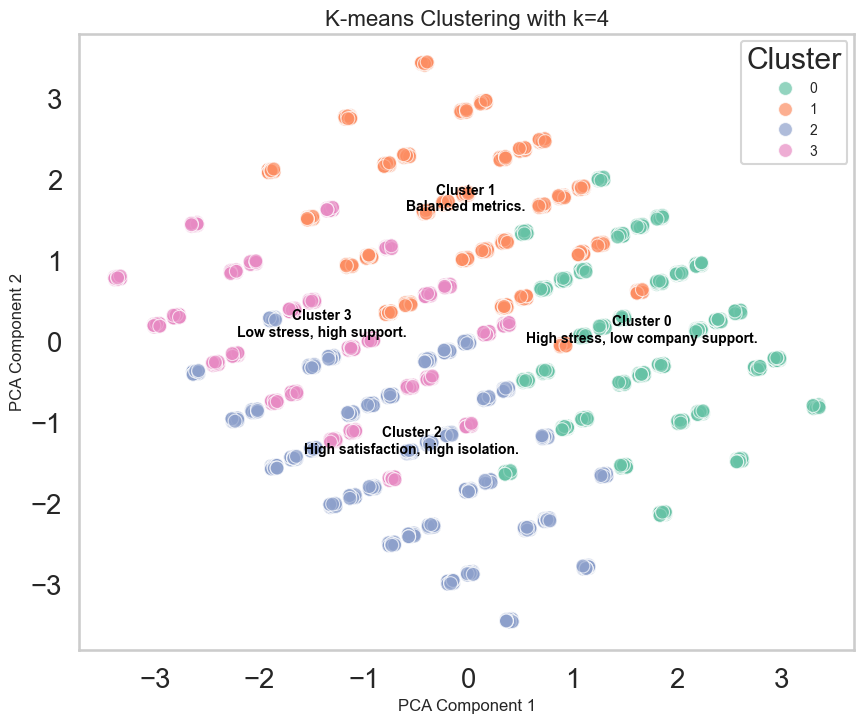

In [5]:
# Step 5: Visualize Clusters with PCA

# Initialize PCA and transform data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_for_clustering.drop(columns=['Cluster']))

# Add PCA results to the dataset
data_for_clustering['PCA1'] = pca_result[:, 0]
data_for_clustering['PCA2'] = pca_result[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=data_for_clustering,
    palette='Set2', s=100, alpha=0.7
)
plt.title('K-means Clustering with k=4', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Cluster', fontsize=10, loc='upper right')

# Annotate clusters
annotations = {
    0: "High stress, low company support.",
    1: "Balanced metrics.",
    2: "High satisfaction, high isolation.",
    3: "Low stress, high support."
}
for cluster_id, annotation in annotations.items():
    cluster_data = data_for_clustering[data_for_clustering['Cluster'] == cluster_id]
    mean_x, mean_y = cluster_data['PCA1'].mean(), cluster_data['PCA2'].mean()
    plt.text(mean_x, mean_y, f"Cluster {cluster_id}\n{annotation}",
             fontsize=10, weight='bold', ha='center', color='black')

plt.grid()
plt.show()

In [6]:
# **Step 6: Analyze Cluster Characteristics**

# Summarize characteristics of each cluster
cluster_summary = data_for_clustering.groupby('Cluster')[selected_columns].mean()
print("Cluster Characteristics:")
print(cluster_summary)

# Add textual interpretation for each cluster
print("\nInterpretation:")
print("Cluster 0: High stress levels, low company support.")
print("Cluster 1: Balanced stress levels and work-life balance.")
print("Cluster 2: High satisfaction with remote work, but high isolation.")
print("Cluster 3: Well-supported employees with low stress levels.")

Cluster Characteristics:
         Stress_Level  Work_Life_Balance_Rating  Social_Isolation_Rating  \
Cluster                                                                    
0            0.983051                  3.159912                 2.280766   
1            1.021061                  3.187869                 1.645324   
2            1.044849                  0.816398                 3.114226   
3            0.975705                  0.818270                 0.463557   

         Satisfaction_with_Remote_Work  Company_Support_for_Remote_Work  
Cluster                                                                  
0                             1.029477                         3.270450  
1                             1.003370                         0.665543  
2                             0.976875                         1.864751  
3                             0.987366                         2.089407  

Interpretation:
Cluster 0: High stress levels, low company support.
Clust